# Rain Fall Prediction

In [18]:
# Import Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings(action="ignore")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_curve, roc_auc_score

In [19]:
# Load the data
df = pd.read_csv("weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [20]:
df.shape

(145460, 23)

In [21]:
# Check Nan Values
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

There are a lot a missing values

In [22]:
# Check datatypes
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

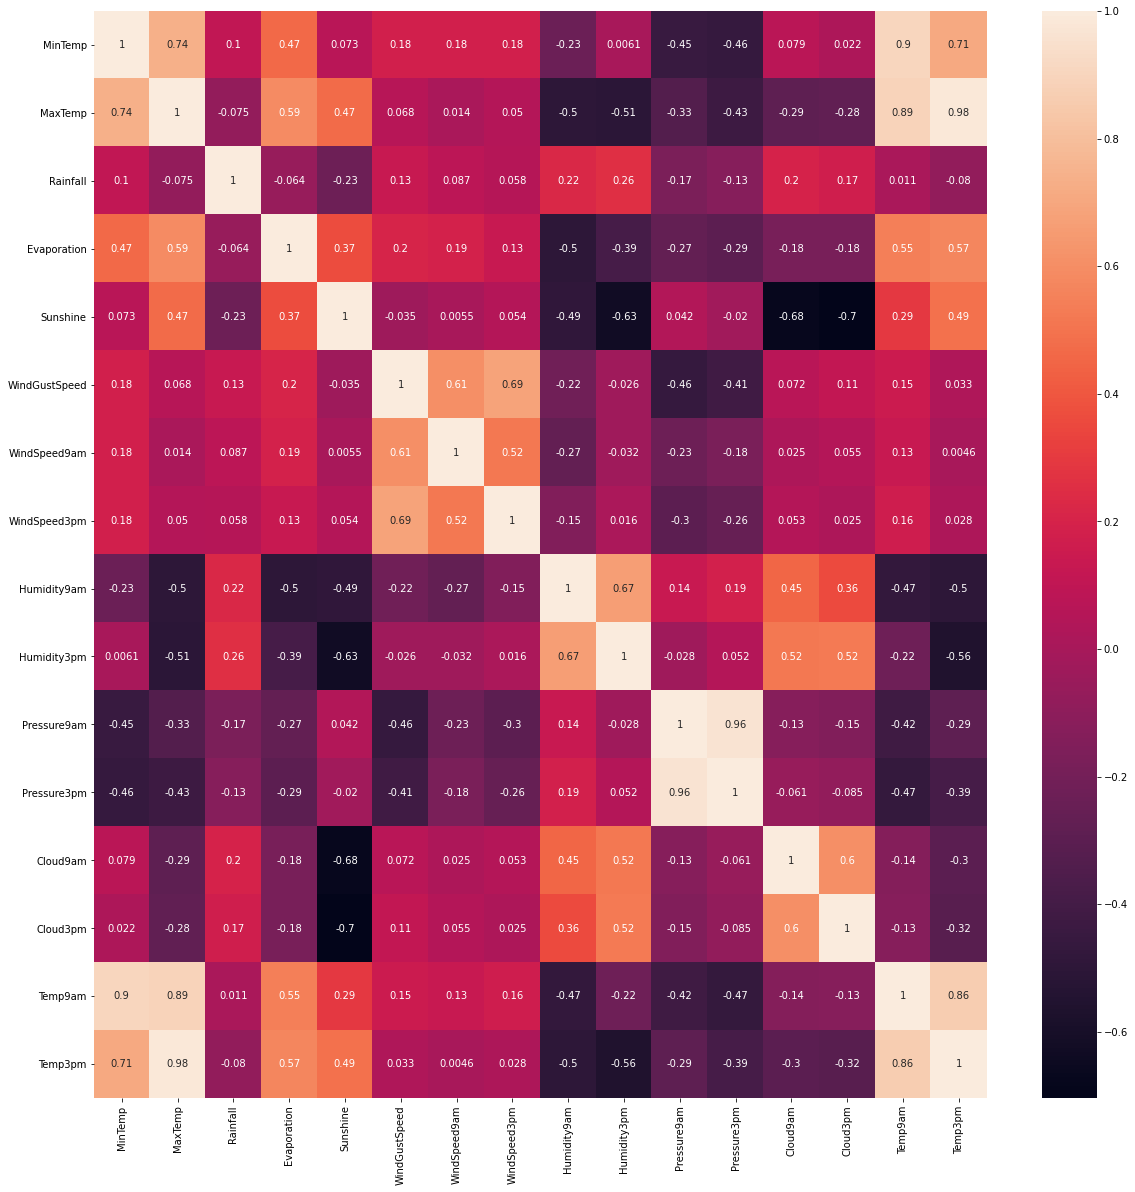

In [23]:
import matplotlib.pyplot as plt
# Check correlation
corrmat = df.corr()
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

Inferences from Heatmap:

 - MinTemp and Temp9am highly correlated.
 - MinTemp and Temp3pm highly correlated.
 - MaxTemp and Temp9am highly correlated.
 - MaxTemp and Temp3pm highly correlated.
 - Temp3pm and Temp9am highly correlated.

 So just drop Temp3pm , Temp9am column.

In [24]:
# Dropping highly correlated columns
df=df.drop(['Date','Temp3pm','Temp9am'],axis=1)
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

## Firstly Handle all the missing values in Continous features

'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm'

 These all are Continous features

In [25]:
# Create a function to handle missing values in Continous features
def impute_nan(df , variable):
    df[variable] = df[variable].fillna(df[variable].mean())

In [26]:
impute_nan(df , "MinTemp")
impute_nan(df , "MaxTemp")
impute_nan(df , "Rainfall")
impute_nan(df , "Evaporation")
impute_nan(df , "Sunshine")
impute_nan(df , "WindGustSpeed")
impute_nan(df , "WindSpeed9am")
impute_nan(df , "WindSpeed3pm")
impute_nan(df , "Humidity9am")
impute_nan(df , "Humidity3pm")
impute_nan(df , "Pressure9am")
impute_nan(df , "Cloud9am")
impute_nan(df , "Cloud3pm")


In [27]:
df.isnull().sum()

Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm      15028
Cloud9am             0
Cloud3pm             0
RainToday         3261
RainTomorrow      3267
dtype: int64

All the missing values in Continuous fatures are handled

## Now Handle all the missing values in Categorical Features
'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'

These all are Categorical Features who have nan values

In [28]:
df["WindGustDir"] = df["WindGustDir"].fillna(df["WindGustDir"].value_counts().index[0])
df["WindDir9am"] = df["WindDir9am"].fillna(df["WindDir9am"].value_counts().index[0])
df["WindDir3pm"] = df["WindDir3pm"].fillna(df["WindDir3pm"].value_counts().index[0])

In [29]:
df["RainToday"] = df["RainToday"].fillna(df["RainToday"].value_counts().index[0])
df["RainTomorrow"] = df["RainTomorrow"].fillna(df["RainTomorrow"].value_counts().index[0])

In [30]:
df.isnull().sum()

Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir          0
WindGustSpeed        0
WindDir9am           0
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm      15028
Cloud9am             0
Cloud3pm             0
RainToday            0
RainTomorrow         0
dtype: int64

In [31]:
impute_nan(df , "Pressure3pm")

In [32]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
RainToday        0
RainTomorrow     0
dtype: int64

Finally all the NaN values are handled in Continous and categorical features

## Convert all the categorical features into numerical form

In [33]:
location = {'Portland':1, 'Cairns':2, 'Walpole':3, 'Dartmoor':4, 'MountGambier':5,
       'NorfolkIsland':6, 'Albany':7, 'Witchcliffe':8, 'CoffsHarbour':9, 'Sydney':10,
       'Darwin':11, 'MountGinini':12, 'NorahHead':13, 'Ballarat':14, 'GoldCoast':15,
       'SydneyAirport':16, 'Hobart':17, 'Watsonia':18, 'Newcastle':19, 'Wollongong':20,
       'Brisbane':21, 'Williamtown':22, 'Launceston':23, 'Adelaide':24, 'MelbourneAirport':25,
       'Perth':26, 'Sale':27, 'Melbourne':28, 'Canberra':29, 'Albury':30, 'Penrith':31,
       'Nuriootpa':32, 'BadgerysCreek':33, 'Tuggeranong':34, 'PerthAirport':35, 'Bendigo':36,
       'Richmond':37, 'WaggaWagga':38, 'Townsville':39, 'PearceRAAF':40, 'SalmonGums':41,
       'Moree':42, 'Cobar':43, 'Mildura':44, 'Katherine':45, 'AliceSprings':46, 'Nhil':47,
       'Woomera':48, 'Uluru':49}

df["Location"] = df["Location"].map(location)

In [34]:
# Handle the WindGustDir , WindDir9am and WindDir3pm

windgustdir = {'NNW':1, 'NW':2, 'WNW':3, 'N':4, 'W':5, 'WSW':6, 'NNE':7, 'S':8, 'SSW':9, 'SW':10, 'SSE':11,
       'NE':12, 'SE':13, 'ESE':14, 'ENE':15, 'E':16}
winddir9am = {'NNW':1, 'N':2, 'NW':3, 'NNE':4, 'WNW':5, 'W':6, 'WSW':7, 'SW':8, 'SSW':9, 'NE':10, 'S':11,
       'SSE':12, 'ENE':13, 'SE':14, 'ESE':15, 'E':16}
winddir3pm = {'NW':1, 'NNW':2, 'N':3, 'WNW':4, 'W':5, 'NNE':6, 'WSW':7, 'SSW':8, 'S':9, 'SW':10, 'SE':11,
       'NE':12, 'SSE':13, 'ENE':14, 'E':15, 'ESE':16}
df["WindGustDir"] = df["WindGustDir"].map(windgustdir)
df["WindDir9am"] = df["WindDir9am"].map(winddir9am)
df["WindDir3pm"] = df["WindDir3pm"].map(winddir3pm)

In [35]:
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})

In [36]:
df.dtypes

Location           int64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int64
WindGustSpeed    float64
WindDir9am         int64
WindDir3pm         int64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
RainToday          int64
RainTomorrow       int64
dtype: object

In [37]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,30,13.4,22.9,0.6,5.468232,7.611178,5,44.0,6,4,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,0,0
1,30,7.4,25.1,0.0,5.468232,7.611178,3,44.0,1,7,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,0,0
2,30,12.9,25.7,0.0,5.468232,7.611178,6,46.0,6,7,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,0,0
3,30,9.2,28.0,0.0,5.468232,7.611178,12,24.0,14,15,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,0,0
4,30,17.5,32.3,1.0,5.468232,7.611178,5,41.0,13,1,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,0,0


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

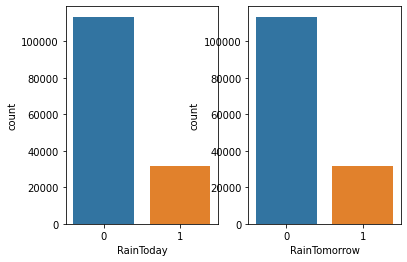

<Figure size 1440x504 with 0 Axes>

In [38]:
## Countplot for RaiToday and RainTomorrow
fig, ax =plt.subplots(1,2)
plt.figure(figsize=(20,7))
sns.countplot(df["RainToday"],ax=ax[0])
sns.countplot(df["RainTomorrow"],ax = ax[1])

In [39]:
# Handled inbalanced data
from collections import Counter

sm = SMOTE(random_state=0)
x, y = sm.fit_resample(df.iloc[:,:-1], df.iloc[:,-1])
print("The number of classes after fit {}".format(Counter(y)))


The number of classes after fit Counter({0: 113583, 1: 113583})


In [40]:
# Split the data into train and test set
X_train , X_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state=42)


In [41]:
X_train.shape , X_test.shape

((181732, 19), (45434, 19))

In [42]:
y_train.shape , y_test.shape

((181732,), (45434,))

In [43]:
X_train.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday'],
      dtype='object')

## Model Selection

We Train Multiple Classifiers and Choose best Accuracy Model

XGBoost Model
 - XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way.

In [44]:
xgb = XGBClassifier(objective='binary:logistic')
xgb.fit(X_train , y_train)

[17:54:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [45]:
# Accuracy of the XGBoost Model
y_pred1 = xgb.predict(X_test)
print(f"Accuracy of the XGBoost Model is:- {accuracy_score(y_test , y_pred1)*100} %")
print("Classification Report")
report = classification_report(y_test , y_pred1)
print(report)

Accuracy of the XGBoost Model is:- 90.66117885284149 %
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     22586
           1       0.94      0.87      0.90     22848

    accuracy                           0.91     45434
   macro avg       0.91      0.91      0.91     45434
weighted avg       0.91      0.91      0.91     45434



Random Forest Classifier Model

In [46]:
random_tree = RandomForestClassifier(n_estimators = 100) # You can increase the number of Decision tree if you want

random_tree.fit(X_train , y_train)

RandomForestClassifier()

In [47]:
# Accuracy of the Random Forest Classifier Model
y_pred2 = random_tree.predict(X_test)
print(f"Accuracy of the XGBoost Model is:- {accuracy_score(y_test , y_pred2)*100} %")
print("Classification Report")
report = classification_report(y_test , y_pred2)
print(report)

Accuracy of the XGBoost Model is:- 90.72720869833164 %
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     22586
           1       0.91      0.91      0.91     22848

    accuracy                           0.91     45434
   macro avg       0.91      0.91      0.91     45434
weighted avg       0.91      0.91      0.91     45434



Gradient Boosting Classifier

In [48]:
boost_model = GradientBoostingClassifier(n_estimators=100)
boost_model.fit(X_train , y_train)


GradientBoostingClassifier()

In [49]:
# Accuracy of the Random Forest Classifier Model
y_pred3 = boost_model.predict(X_test)
print(f"Accuracy of the XGBoost Model is:- {accuracy_score(y_test , y_pred3)*100} %")
print("Classification Report")
report = classification_report(y_test , y_pred3)
print(report)

Accuracy of the XGBoost Model is:- 86.01047673548445 %
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.87      0.86     22586
           1       0.87      0.85      0.86     22848

    accuracy                           0.86     45434
   macro avg       0.86      0.86      0.86     45434
weighted avg       0.86      0.86      0.86     45434



Decision Tree Classifier

In [50]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train , y_train)

DecisionTreeClassifier()

In [51]:
# Accuracy of the Decision Tree Classifier Model
y_pred4 = tree_model.predict(X_test)
print(f"Accuracy of the XGBoost Model is:- {accuracy_score(y_test , y_pred4)*100} %")
print("Classification Report")
report = classification_report(y_test , y_pred4)
print(report)

Accuracy of the XGBoost Model is:- 84.40595149007352 %
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.83      0.84     22586
           1       0.84      0.85      0.85     22848

    accuracy                           0.84     45434
   macro avg       0.84      0.84      0.84     45434
weighted avg       0.84      0.84      0.84     45434



RandomForestClassifier Perform Better Performance than the others so we just save this model.
you can also train more classifiers like catboost classifier , lightGBM classifier etc.

In [56]:
# Save the model
import pickle

filename = "tree_model.pkl"

pickle.dump(tree_model , open(filename , "wb"))